In [9]:
!pip install tqdm.notebook

ERROR: Could not find a version that satisfies the requirement tqdm.notebook (from versions: none)

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for tqdm.notebook


In [90]:
!pip install konlpy

  Using cached konlpy-0.6.0-py2.py3-none-any.whl.metadata (1.9 kB)
Using cached konlpy-0.6.0-py2.py3-none-any.whl (19.4 MB)



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [95]:
!pip install wordcloud matplotlib


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import requests
from bs4 import BeautifulSoup
from tqdm.notebook import tqdm

## 경제 뉴스 기사 링크 수집

In [2]:
url = "https://news.naver.com/section/101"
html = requests.get(url, headers={'User-agent':'Mozilla/5.0'})
soup = BeautifulSoup(html.text, "lxml")
a_tag = soup.find_all("a")

In [3]:
for a in a_tag:
    print(a)

<a href="#ct">본문 바로가기</a>
<a class="Nlogo_link _LINK" data-clk="gnb.naver" data-pc-url="https://www.naver.com/" data-url="https://m.naver.com/" href="https://m.naver.com/"><span class="Nicon_logo">NAVER</span></a>
<a class="_LINK" data-clk="gnb.news" data-pc-url="https://news.naver.com/" data-url="https://m.news.naver.com" href="https://m.news.naver.com"><span class="Nicon_service">뉴스</span></a>
<a class="_LINK" data-clk="gnb.entertain" data-pc-url="https://entertain.naver.com/home" data-url="https://m.entertain.naver.com" href="https://m.entertain.naver.com">
<span class="Nicon_family Nicon_entertain">엔터</span>
</a>
<a class="_LINK" data-clk="gnb.sports" data-pc-url="https://sports.news.naver.com/index" data-url="https://m.sports.naver.com" href="https://m.sports.naver.com">
<span class="Nicon_family Nicon_sports">스포츠</span>
</a>
<a data-clk="gnb.weather" href="https://weather.naver.com">
<span class="Nicon_family Nicon_weather">날씨</span>
</a>
<a data-clk="gnb.premium" href="https://c

In [4]:
# 네이버 경제 카테고리의 뉴스 기사 중 메인 페이지에 뜨는 기사 링크 가져오기
url_set = set()

for a in a_tag:
    if a["href"].startswith("https://n.news.naver.com/mnews/article/") and "comment" not in a["href"]:  # 경제 뉴스 기사 링크만 가져오기
            url_set.add(a["href"])

In [5]:
print(url_set)

{'https://n.news.naver.com/mnews/article/005/0001759161', 'https://n.news.naver.com/mnews/article/421/0008092941', 'https://n.news.naver.com/mnews/article/629/0000367111', 'https://n.news.naver.com/mnews/article/023/0003889782', 'https://n.news.naver.com/mnews/article/025/0003422529', 'https://n.news.naver.com/mnews/article/082/0001313040', 'https://n.news.naver.com/mnews/article/023/0003889765', 'https://n.news.naver.com/mnews/article/009/0005448479', 'https://n.news.naver.com/mnews/article/081/0003520074', 'https://n.news.naver.com/mnews/article/214/0001407180', 'https://n.news.naver.com/mnews/article/277/0005550470', 'https://n.news.naver.com/mnews/article/023/0003889772', 'https://n.news.naver.com/mnews/article/022/0004013372', 'https://n.news.naver.com/mnews/article/005/0001759155', 'https://n.news.naver.com/mnews/article/009/0005448461', 'https://n.news.naver.com/mnews/article/015/0005098090', 'https://n.news.naver.com/mnews/article/015/0005098066', 'https://n.news.naver.com/mnew

## 뉴스 기사 파싱

In [6]:
# 기사 타이틀, 본문 셀렉터
title_selector = "#title_area > span"
main_selector = "#dic_area"

In [7]:
# 뉴스 기사 파싱
url = list(url_set)[0]
html = requests.get(url, headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/110.0.0.0 Safari/537.36"})
soup = BeautifulSoup(html.text, "lxml")

## 기사 제목 추출

In [8]:
title = soup.select(title_selector)
title_lst = [t.text for t in title]
title_str = "".join(title_lst)
title_str

'조정호 주식 부자 2위로… 이재용 턱밑 추격'

## 기사 본문 추출

In [9]:
main = soup.select(main_selector)
main_lst = []
for m in main:
    m_text = m.text
    m_text = m_text.strip()
    main_lst.append(m_text)

main_str = "".join(main_lst)

In [10]:
main_str

'조 회장 주식 가치 12조원 넘어삼성생명·삼성물산 주가는 하락세\n\n\n\n적극적인 밸류업(기업 가치 제고) 정책과 실적이 뒷받침된 메리츠금융지주의 주가 상승이 국내 주식 부호 순위를 흔들고 있다. 국내 주식 부자 1위 이재용 삼성전자 회장이 보유한 삼성생명 삼성물산 등의 주가가 하락세인 반면 조정호(사진) 회장의 메리츠금융지주 주가는 상승세를 이어가면서 두 사람의 주식평가액 격차가 5%대로 좁혀졌다.23일 기업분석전문 한국CXO연구소에 따르면 조 회장의 주식가치는 21일 기준 12조2183억원으로 집계됐다. 조 회장은 메리츠금융지주 지분 51.25%를 갖고 있다. 20일 처음으로 주식 평가액이 12조원을 넘으며 12조229억원을 기록한 뒤 하루 만에 1955억원이 더 불었다.반면 이 회장의 주식 재산은 20일(13조1838억원)에서 21일(12조9201억원)으로 하루 새 2600억원 넘게 줄었다. 그가 보유한 삼성생명(-5.45%)과 삼성물산(-2.86%), 삼성화재(-1.64%), 삼성전자 우선주(-1.11%) 등이 하락한 탓이다. 이 회장과 조 회장 간 주식평가액 격차도 지난 20일 8.8%에서 21일 5.4%로 좁혀졌다.한국CXO연구소는 이런 추세라면 곧 국내 주식 부자 1위가 바뀔 가능성이 있다고 봤다. 일단 메리츠금융지주의 상승세가 이어질 가능성이 크다. SK증권은 지난 20일 메리츠금융지주 목표가를 상향하며 자회사인 메리츠화재와 메리츠증권 모두 이익이 꾸준히 늘어날 것으로 봤다.반면 삼성생명과 삼성물산 삼성전자의 전망은 좋지 않다. 미래에셋증권은 21일 삼성생명 투자의견을 ‘매수’에서 ‘중립’으로 하향하며 “기업가치 제고 계획이 발표되지 않은 데다 실적도 예상보다 좋지 않다”고 평가했다. 삼성전자에 대해서도 1분기 부진한 실적 전망에 복수의 증권사가 목표가를 낮춰 잡았다.오일선 한국CXO연구소장은 “이 회장의 국내 최고 주식 부자 타이틀을 반납하게 되면 삼성의 자존심에 상처가 생기는 상징적인 사건이 될 수 있다”라며 “모든 방안을 동원해 주가 

## 딕셔너리에 저장

In [11]:
art_dic = {}

art_dic["title"] = title_str
art_dic["main"] = main_str

In [12]:
art_dic

{'title': '조정호 주식 부자 2위로… 이재용 턱밑 추격',
 'main': '조 회장 주식 가치 12조원 넘어삼성생명·삼성물산 주가는 하락세\n\n\n\n적극적인 밸류업(기업 가치 제고) 정책과 실적이 뒷받침된 메리츠금융지주의 주가 상승이 국내 주식 부호 순위를 흔들고 있다. 국내 주식 부자 1위 이재용 삼성전자 회장이 보유한 삼성생명 삼성물산 등의 주가가 하락세인 반면 조정호(사진) 회장의 메리츠금융지주 주가는 상승세를 이어가면서 두 사람의 주식평가액 격차가 5%대로 좁혀졌다.23일 기업분석전문 한국CXO연구소에 따르면 조 회장의 주식가치는 21일 기준 12조2183억원으로 집계됐다. 조 회장은 메리츠금융지주 지분 51.25%를 갖고 있다. 20일 처음으로 주식 평가액이 12조원을 넘으며 12조229억원을 기록한 뒤 하루 만에 1955억원이 더 불었다.반면 이 회장의 주식 재산은 20일(13조1838억원)에서 21일(12조9201억원)으로 하루 새 2600억원 넘게 줄었다. 그가 보유한 삼성생명(-5.45%)과 삼성물산(-2.86%), 삼성화재(-1.64%), 삼성전자 우선주(-1.11%) 등이 하락한 탓이다. 이 회장과 조 회장 간 주식평가액 격차도 지난 20일 8.8%에서 21일 5.4%로 좁혀졌다.한국CXO연구소는 이런 추세라면 곧 국내 주식 부자 1위가 바뀔 가능성이 있다고 봤다. 일단 메리츠금융지주의 상승세가 이어질 가능성이 크다. SK증권은 지난 20일 메리츠금융지주 목표가를 상향하며 자회사인 메리츠화재와 메리츠증권 모두 이익이 꾸준히 늘어날 것으로 봤다.반면 삼성생명과 삼성물산 삼성전자의 전망은 좋지 않다. 미래에셋증권은 21일 삼성생명 투자의견을 ‘매수’에서 ‘중립’으로 하향하며 “기업가치 제고 계획이 발표되지 않은 데다 실적도 예상보다 좋지 않다”고 평가했다. 삼성전자에 대해서도 1분기 부진한 실적 전망에 복수의 증권사가 목표가를 낮춰 잡았다.오일선 한국CXO연구소장은 “이 회장의 국내 최고 주식 부자 타이틀을 반납하게 되면 삼성의 

## 전체 기사 데이터 수집

In [13]:
url_lst = list(url_set)
art_lst = []

for url in tqdm(url_lst):
    # 기사 타이틀, 본문 셀렉터
    title_selector = "#title_area > span"
    main_selector = "#dic_area"
    
    # 뉴스 기사 파싱
    html = requests.get(url, headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/110.0.0.0 Safari/537.36"})
    soup = BeautifulSoup(html.text, "lxml")
    
    title = soup.select(title_selector)
    title_lst = [t.text for t in title]
    title_str = "".join(title_lst)
    
    main = soup.select(main_selector)
    main_lst = []
    for m in main:
        m_text = m.text
        m_text = m_text.strip()
        main_lst.append(m_text)

    main_str = "".join(main_lst)
    
    
    art_dic = {}

    art_dic["title"] = title_str
    art_dic["main"] = main_str
    
    art_lst.append(art_dic)

  0%|          | 0/46 [00:00<?, ?it/s]

In [14]:
art_lst

[{'title': '조정호 주식 부자 2위로… 이재용 턱밑 추격',
  'main': '조 회장 주식 가치 12조원 넘어삼성생명·삼성물산 주가는 하락세\n\n\n\n적극적인 밸류업(기업 가치 제고) 정책과 실적이 뒷받침된 메리츠금융지주의 주가 상승이 국내 주식 부호 순위를 흔들고 있다. 국내 주식 부자 1위 이재용 삼성전자 회장이 보유한 삼성생명 삼성물산 등의 주가가 하락세인 반면 조정호(사진) 회장의 메리츠금융지주 주가는 상승세를 이어가면서 두 사람의 주식평가액 격차가 5%대로 좁혀졌다.23일 기업분석전문 한국CXO연구소에 따르면 조 회장의 주식가치는 21일 기준 12조2183억원으로 집계됐다. 조 회장은 메리츠금융지주 지분 51.25%를 갖고 있다. 20일 처음으로 주식 평가액이 12조원을 넘으며 12조229억원을 기록한 뒤 하루 만에 1955억원이 더 불었다.반면 이 회장의 주식 재산은 20일(13조1838억원)에서 21일(12조9201억원)으로 하루 새 2600억원 넘게 줄었다. 그가 보유한 삼성생명(-5.45%)과 삼성물산(-2.86%), 삼성화재(-1.64%), 삼성전자 우선주(-1.11%) 등이 하락한 탓이다. 이 회장과 조 회장 간 주식평가액 격차도 지난 20일 8.8%에서 21일 5.4%로 좁혀졌다.한국CXO연구소는 이런 추세라면 곧 국내 주식 부자 1위가 바뀔 가능성이 있다고 봤다. 일단 메리츠금융지주의 상승세가 이어질 가능성이 크다. SK증권은 지난 20일 메리츠금융지주 목표가를 상향하며 자회사인 메리츠화재와 메리츠증권 모두 이익이 꾸준히 늘어날 것으로 봤다.반면 삼성생명과 삼성물산 삼성전자의 전망은 좋지 않다. 미래에셋증권은 21일 삼성생명 투자의견을 ‘매수’에서 ‘중립’으로 하향하며 “기업가치 제고 계획이 발표되지 않은 데다 실적도 예상보다 좋지 않다”고 평가했다. 삼성전자에 대해서도 1분기 부진한 실적 전망에 복수의 증권사가 목표가를 낮춰 잡았다.오일선 한국CXO연구소장은 “이 회장의 국내 최고 주식 부자 타이틀을 반납하게 되면 삼성

## 데이터프레임으로 전환

In [15]:
import pandas as pd

art_df = pd.DataFrame(art_lst)
art_df

,title,main
0,조정호 주식 부자 2위로… 이재용 턱밑 추격,조 회장 주식 가치 12조원 넘어삼성생명·삼성물산 주가는 하락세\n\n\n\n적극적...
1,"최태원 ""한미일 '빅프로젝트' 필요…대미투자 인센티브 있어야""(종합)","""美 6개 분야 골고루 관심…미측 보조금 집행 잘될 거라 해""""상호관세는 정부 간 ..."
2,"'우리금융 자금 수혈' 우리자산신탁, 책준 부메랑에 '도덕적 해이' 논란","아산 탕정지구 지식산업센터, 시공사 교체 지연·오시공 논란우리자산신탁 ""오시공 해결..."
3,건설 경기 침체 심각한데 레미콘 파동까지 터지나,건설·레미콘 업계 단가 놓고8번 만났지만 합의에 실패오늘 9번째 협상에 나서\t\t...
4,"미국, 중국산 선박 입항에 최대 21억 수수료…K조선, 반사이익?",중국 선박에 대한 미국의 견제가 본격화하는 가운데 국내 조선소들이 중국에 빼앗긴 대...
5,"""2072년 한국 성장률 0.3%·나랏빚 7000조 원…국민연금 2057년 고갈""","국회예산정책처, ‘2025∼2072년 장기재정전망’ 보고서“2050년 무렵 GDP ..."
6,"글로벌 車 기업들, 전기차보다 내연차 액셀 밟는다",전기차 캐즘 장기화로 전략 바꿔 전통의 내연차 강자들이 전기차 개발에 몰두하느라 잠...
7,"“요즘 식탁에 K쌀밥 없으면 안 돼요”…미국인들이 푹 빠진 즉석밥, 매출 신기록",미국 ‘월마트’에서 소비자가 ‘비비고’ 즉석밥(햇반)을 보고 있다. CJ제일제당은 ...
8,수소 버스 연료보조금 1400원 상향…“전기버스 연료비 수준”,"수소버스 연료 보조금, 1㎏당 3600→5000원\n\n\n\n23일 서울의 한 수..."
9,"[스트레이트] 트럼프 관세, '쓰나미'가 몰려온다",[탐사기획 스트레이트]■ 난투극 부른 관세◀ VCR ▶숙적 미국과 캐나다의 아이스하...


## 워드 클라우드 생성

In [91]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 텍스트 데이터 입력
text = "Python Data Science Machine Learning AI Deep Learning NLP Visualization"

# 워드 클라우드 생성
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [108]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False


In [16]:
font_path = '/usr/share/fonts/truetype/nanumfont/NanumGothic.ttf' 


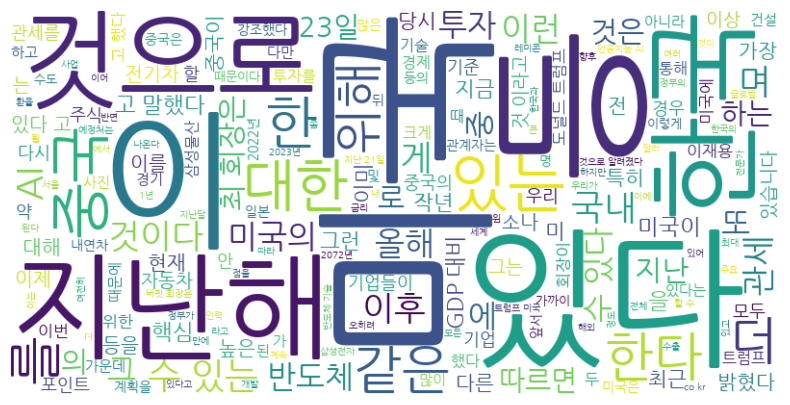

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(art_df["title"]) + " ".join(art_df["main"])

wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=font_path).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


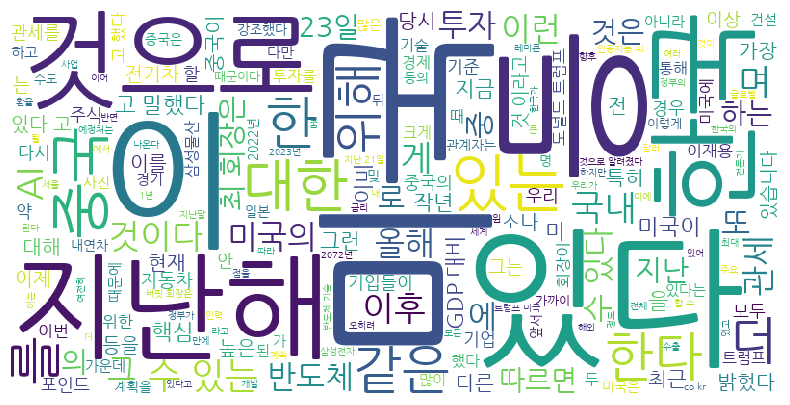

In [21]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='nearest')
plt.axis("off")
plt.show()


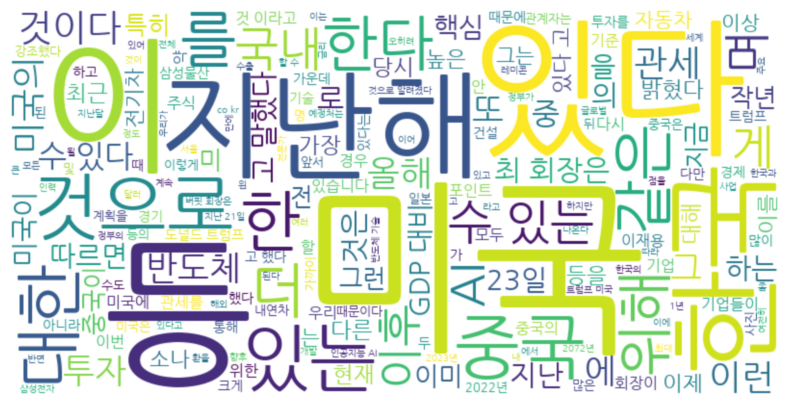

In [19]:
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=font_path).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bicubic')
plt.axis("off")
plt.show()

In [102]:
wordcloud

In [120]:
art_df.to_csv("article.csv")

In [ ]:
# FROM python:3

# ENV JAVA_HOME /usr/lib/jvm/java-1.7-openjdk/jre
# RUN apt-get update && apt-get install -y g++ default-jdk
# RUN pip install konlpy
